# Topic Modeling sur le corpus d'articles


## 1. Import des bibliothèques et des modules du projet


In [1]:
import os
import sys
import pandas as pd
from pathlib import Path

# Ajouter le répertoire parent au chemin de recherche
sys.path.append(os.path.abspath('..'))

# Import des modules du projet
from src.config.config import load_config
from src.data_acquisition.data_loader import DataLoader
from src.topic_modeling.lda_model import LDATopicModel
from src.topic_modeling.nmf_model import NMFTopicModel
from src.topic_modeling.bert_model import BERTopicModel
from src.topic_modeling.topic_visualisation import visualize_topics
from src.topic_modeling.topic_evaluator import evaluate_topic_coherence

# ## 2. Chargement des données prétraitées


In [4]:
# Charger la configuration
config = load_config()

# Chemin vers le fichier de données prétraitées
processed_data_path = Path("../data/processed/corpus_preprocessed.json")

# Vérifier si le fichier existe
if not processed_data_path.exists():
    raise FileNotFoundError(f"Le fichier {processed_data_path} n'existe pas.")

# Créer un objet DataLoader
data_loader = DataLoader(config)

# Charger les données
cleaned_docs = data_loader.load_from_json(processed_data_path)

# Filtrer les documents avec des abstracts non vides
filtered_docs = [doc["abstract"] for doc in cleaned_docs if doc["abstract"].strip() and doc.get("references")]

# Afficher un aperçu des documents
pd.DataFrame(filtered_docs[:5], columns=["Abstracts"])


,Abstracts
0,purpose develop tool high school student study...
1,purpose develop tool high school student study...
2,describes implementation methodology visualisa...
3,describes implementation methodology visualisa...
4,article applied garch instead ar arma compare ...


## 3. Application du Topic Modeling avec LDA


Entraînement du modèle LDA...

Topics détectés avec LDA :
----------------------------------------
Topic 0 : query, web, semantic, text, document, ontology, search, content, database, retrieval
Topic 1 : development, software, tool, environment, technology, support, interaction, social, project, business
Topic 2 : graph, logic, property, given, program, constraint, theory, structure, class, bound
Topic 3 : node, sensor, mobile, implementation, resource, communication, computing, architecture, device, protocol
Topic 4 : agent, search, game, attack, scheme, strategy, planning, protocol, optimization, action
Topic 5 : speech, signal, neural, recognition, control, error, parameter, rate, robot, simulation
Topic 6 : classification, clustering, classifier, experiment, pattern, class, measure, space, distribution, decision
Topic 7 : object, segmentation, detection, shape, region, motion, recognition, visual, spatial, point
----------------------------------------

Score de cohérence LDA : 0.3

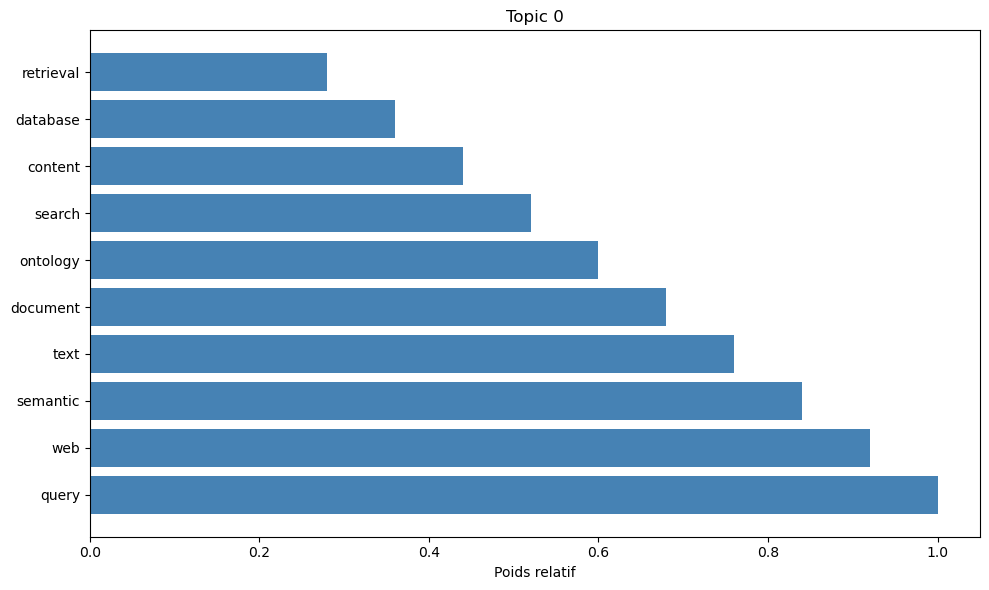

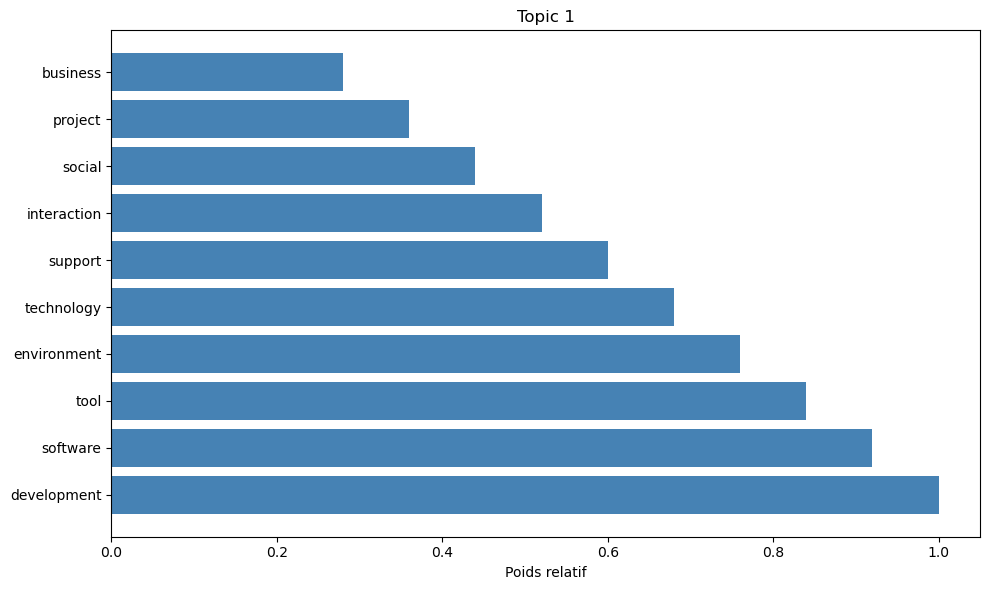

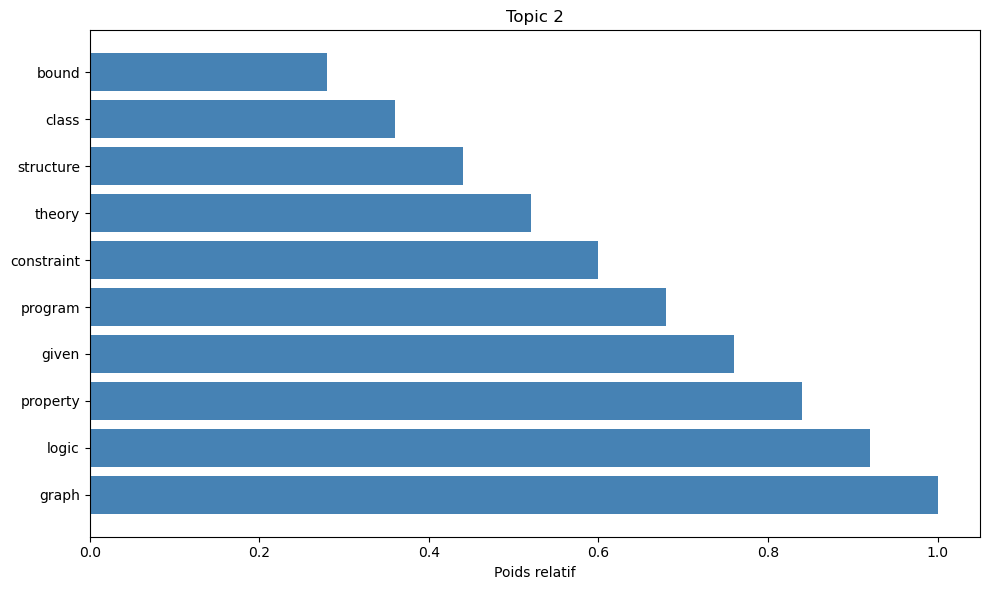

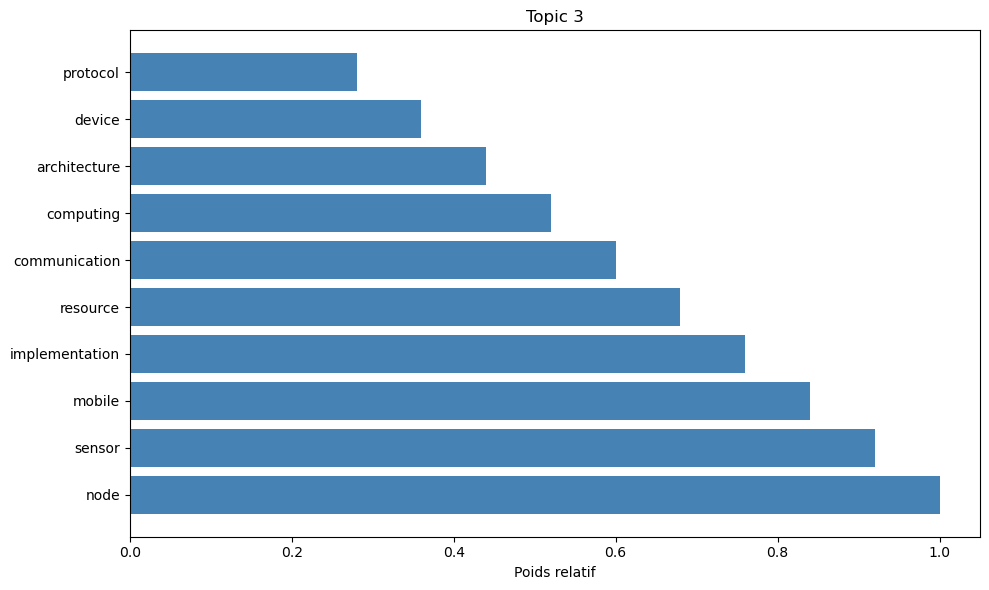

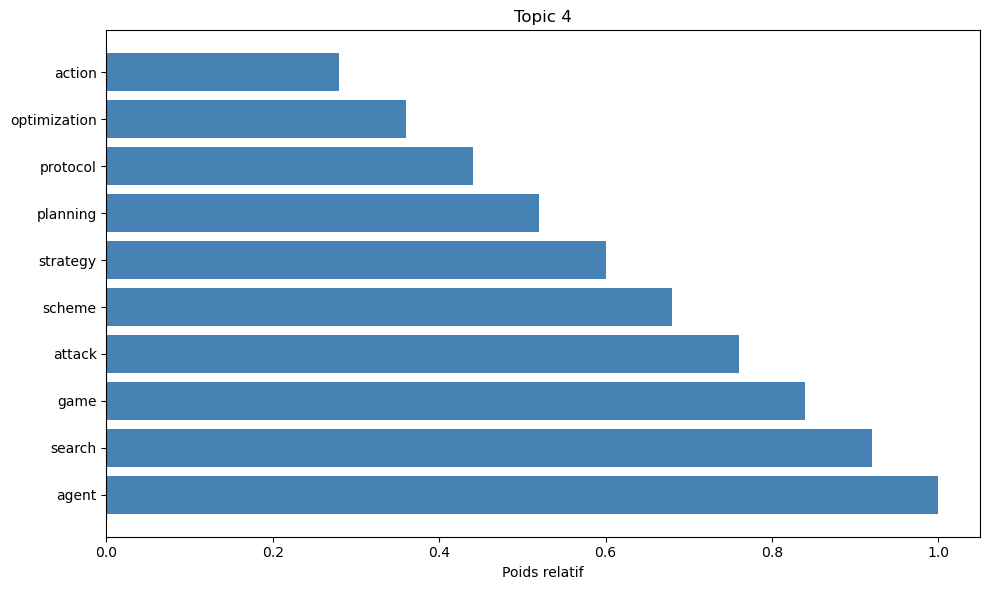

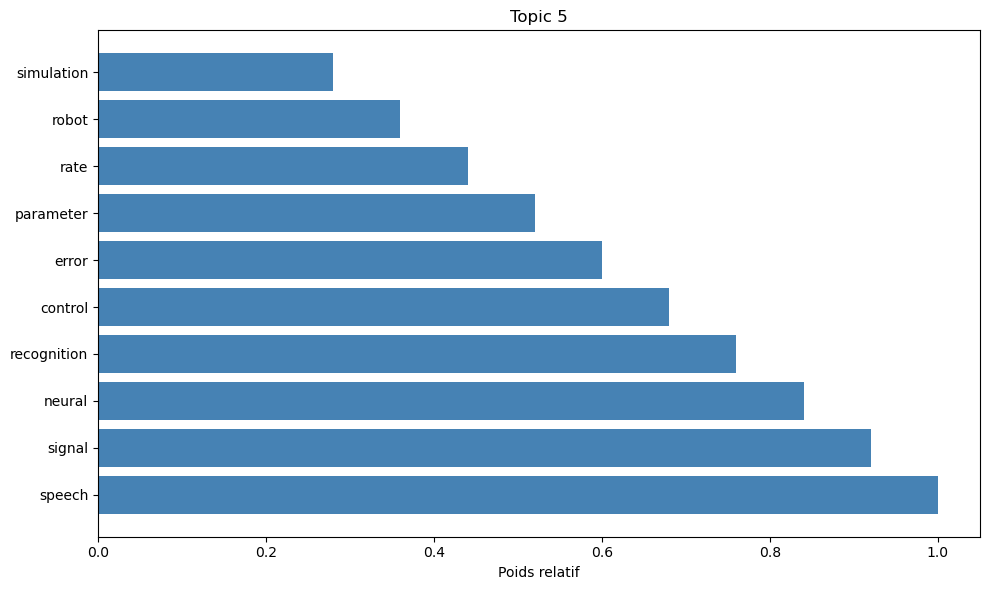

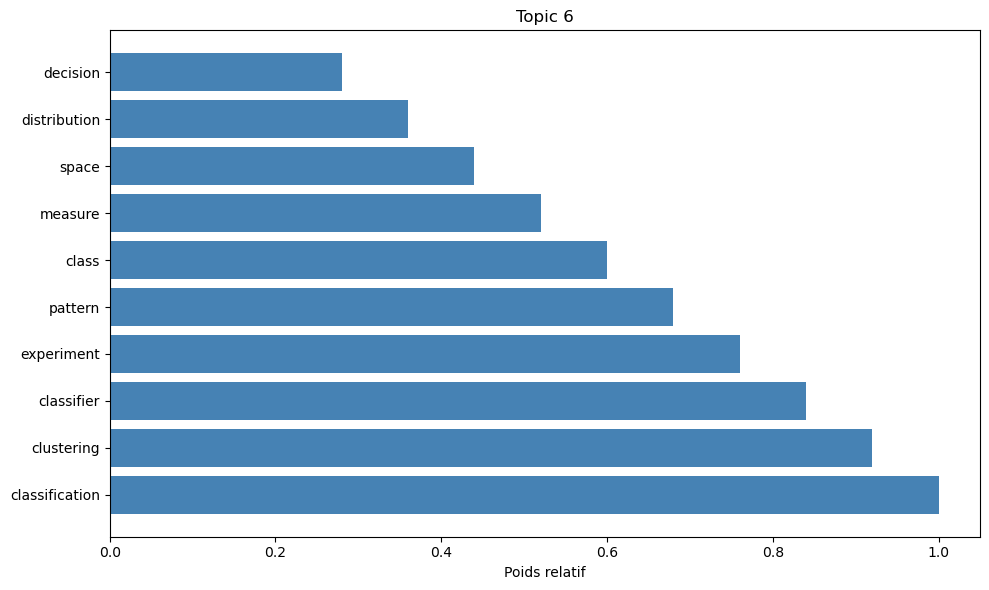

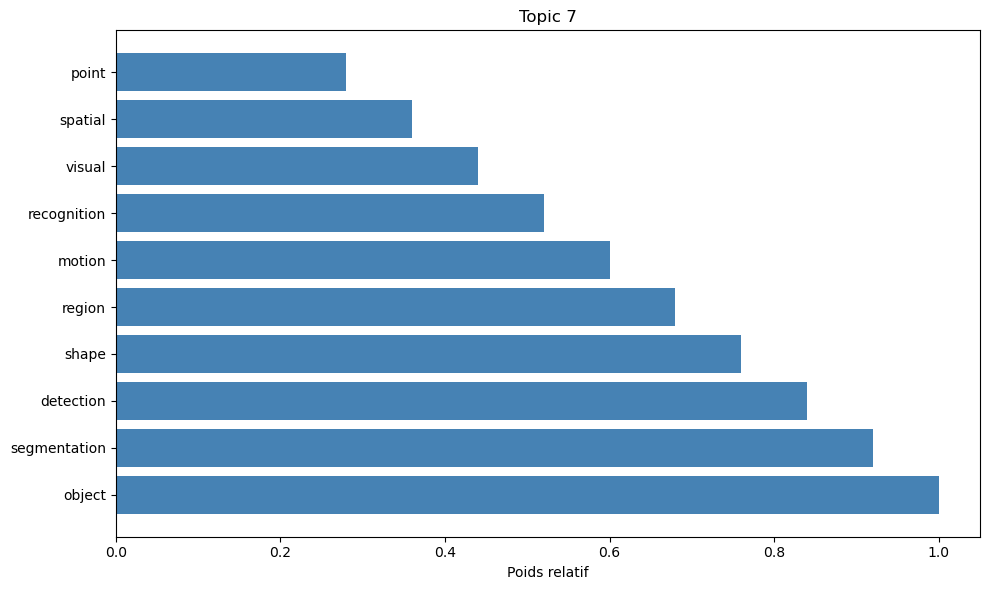

In [3]:
# Initialiser le modèle LDA
lda_model = LDATopicModel(num_topics=8, max_iter=50)

# Entraîner le modèle sur les documents filtrés
print("Entraînement du modèle LDA...")
lda_model.fit(filtered_docs)

# Récupérer les topics avec leurs 10 mots les plus représentatifs
lda_topics = lda_model.get_topics(num_words=10)

# Afficher les topics et leurs mots-clés
print("\nTopics détectés avec LDA :")
print("-" * 40)
for topic, words in lda_topics.items():
    print(f"{topic} : {', '.join(words)}")
print("-" * 40)

# Calculer et afficher le score de cohérence
coherence = evaluate_topic_coherence(lda_model, filtered_docs)
print(f"\nScore de cohérence LDA : {coherence:.4f}")
print("(Un score plus élevé indique des topics mieux définis et distincts)")

# Visualiser les topics avec des graphiques
print("\nVisualisation des topics LDA :")
visualize_topics(lda_topics)

In [4]:
# Obtenir la distribution des topics pour un échantillon de documents
sample_docs = filtered_docs[:5]  # Premiers 5 documents
topic_distribution = lda_model.transform(sample_docs)

# Afficher la distribution
print("\nDistribution des topics pour les 5 premiers documents :")
for i, dist in enumerate(topic_distribution):
    top_topic = dist.argmax()
    print(f"Document {i+1} : Topic principal = Topic {top_topic} ({dist[top_topic]:.2f})")



Distribution des topics pour les 5 premiers documents :
Document 1 : Topic principal = Topic 1 (0.97)
Document 2 : Topic principal = Topic 1 (0.97)
Document 3 : Topic principal = Topic 0 (0.42)
Document 4 : Topic principal = Topic 0 (0.42)
Document 5 : Topic principal = Topic 5 (0.77)


## 4. Application du Topic Modeling avec NMF


Entraînement du modèle NMF...

Topics détectés avec NMF :
----------------------------------------
Topic 0 : software, development, tool, environment, technology, support, management, project, social, architecture
Topic 1 : constraint, program, rule, space, logic, structure, state, property, given, value
Topic 2 : web, query, search, semantic, page, document, ontology, retrieval, database, content
Topic 3 : graph, edge, vertex, node, structure, matching, given, property, degree, random
Topic 4 : agent, environment, game, behavior, multiagent, strategy, action, mechanism, interaction, simulation
Topic 5 : scheme, node, protocol, sensor, security, key, attack, wireless, energy, communication
Topic 6 : object, motion, visual, tracking, video, moving, spatial, structure, robot, detection
Topic 7 : classification, recognition, speech, experiment, pattern, classifier, accuracy, word, detection, training
----------------------------------------

Score de cohérence NMF : 0.2088
(Un score plus 

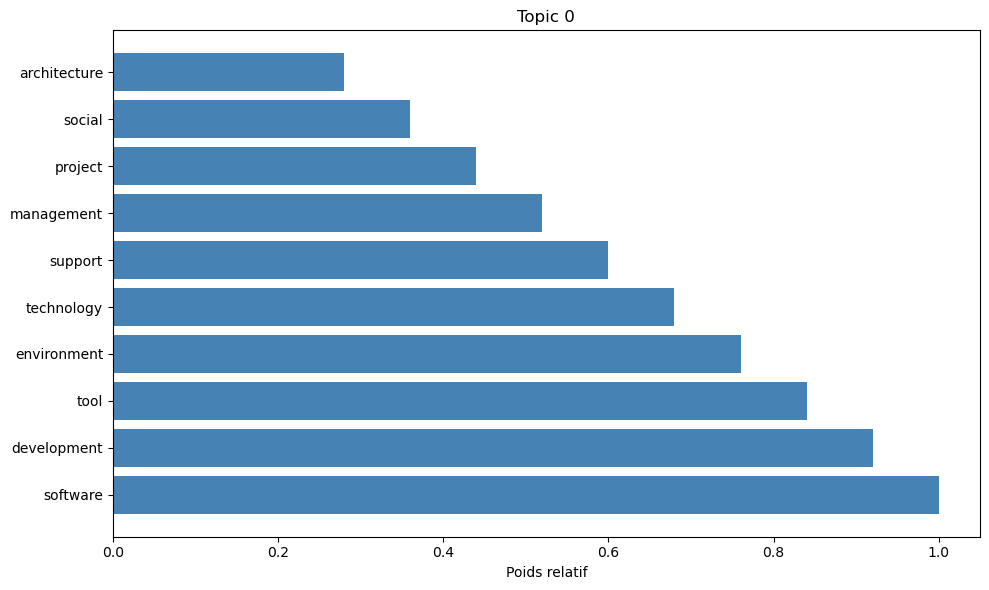

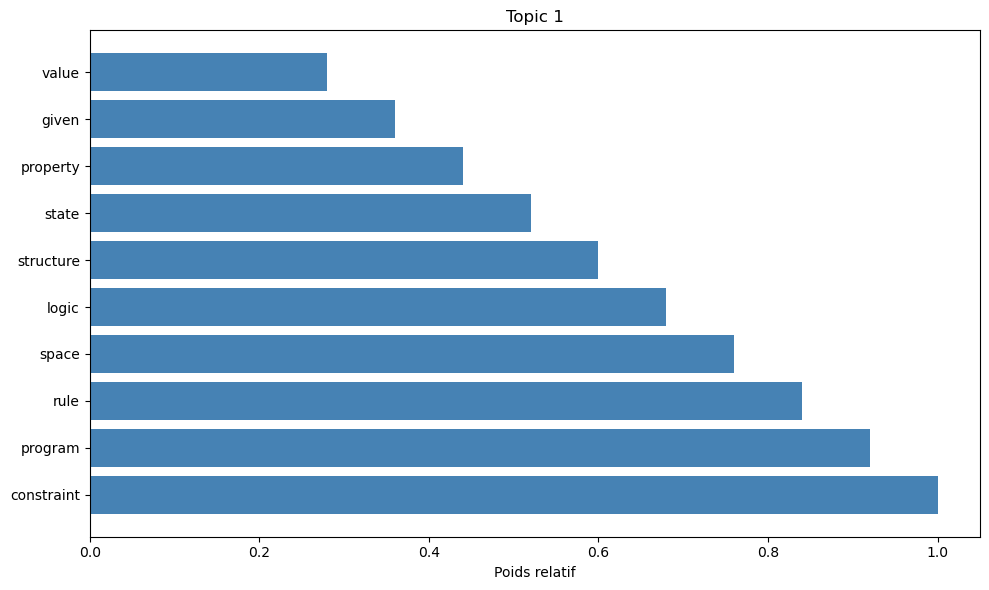

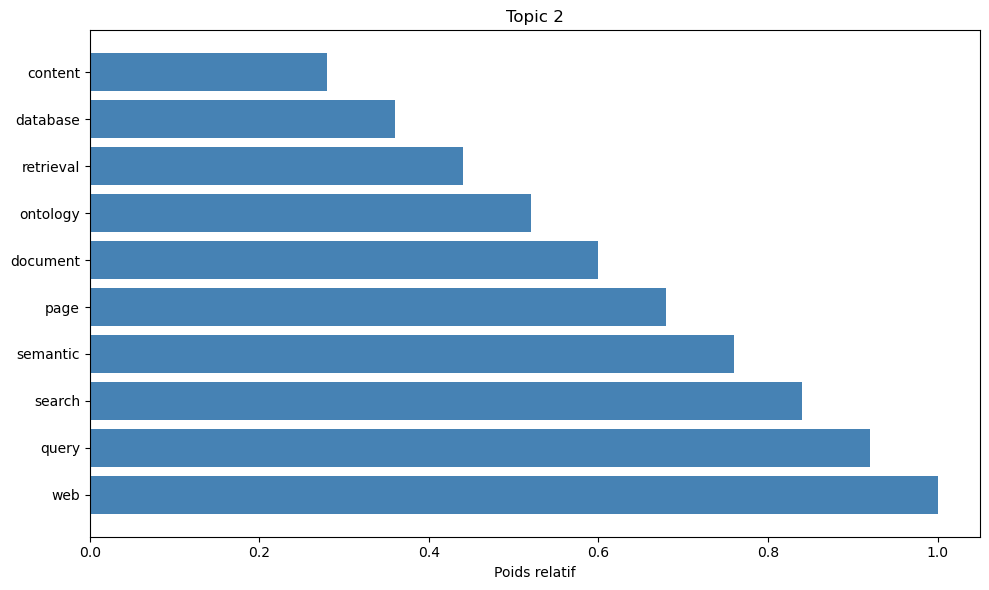

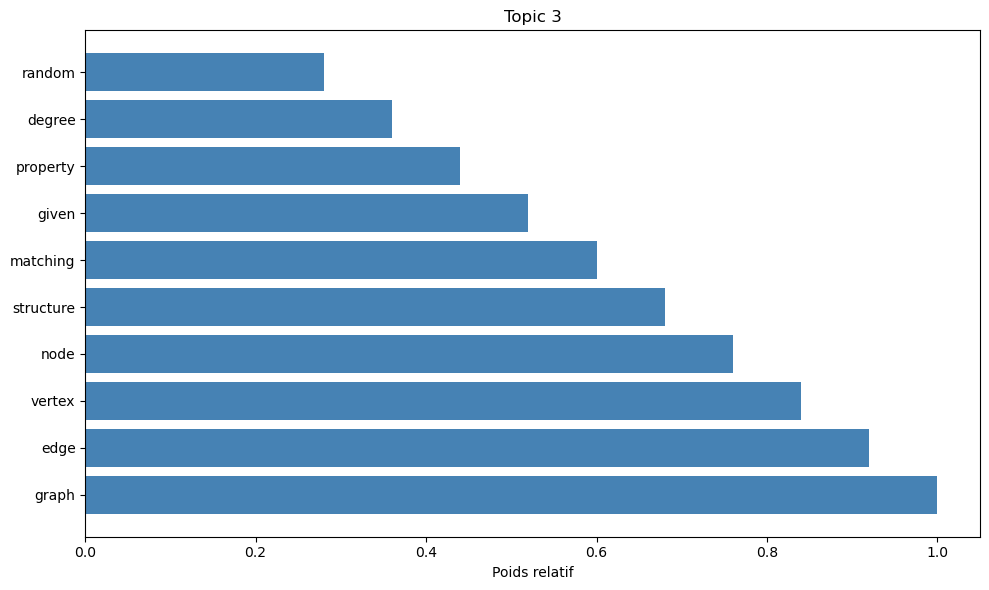

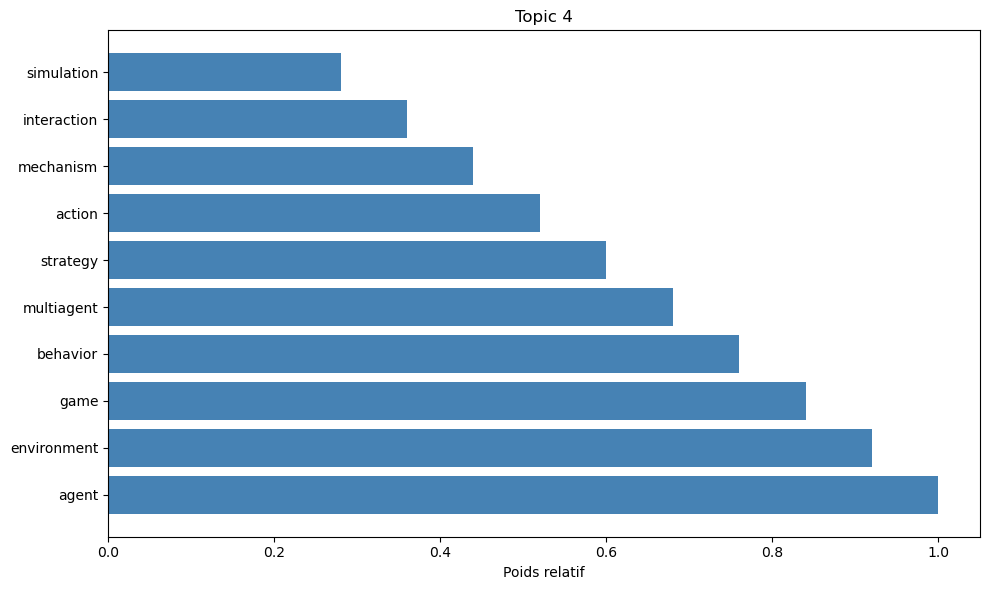

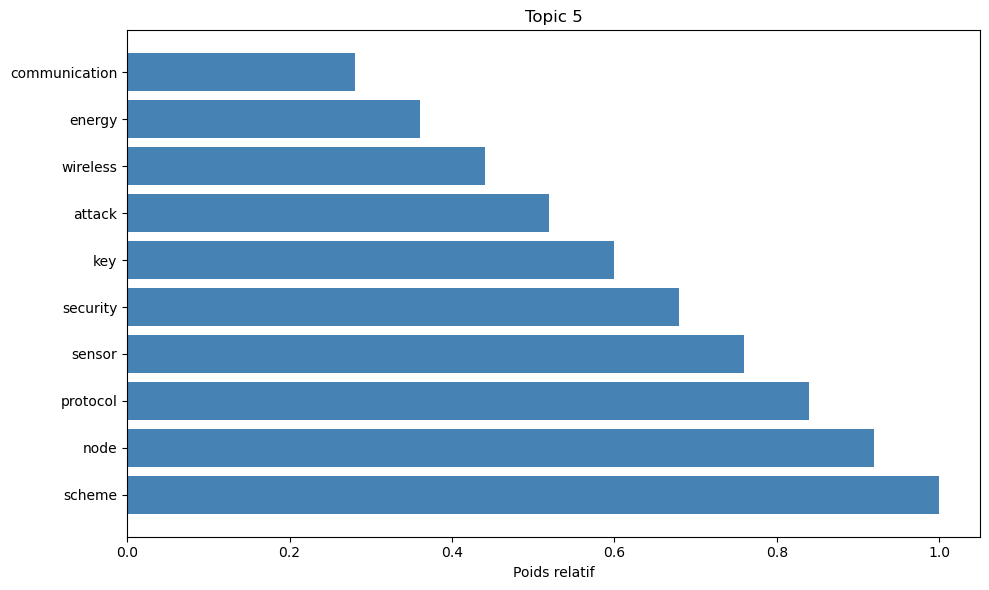

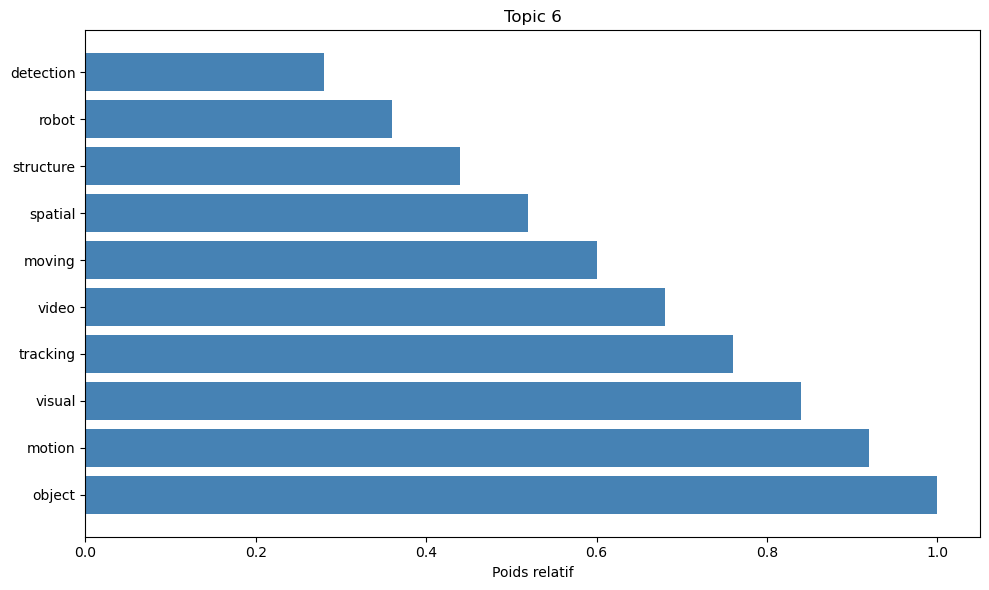

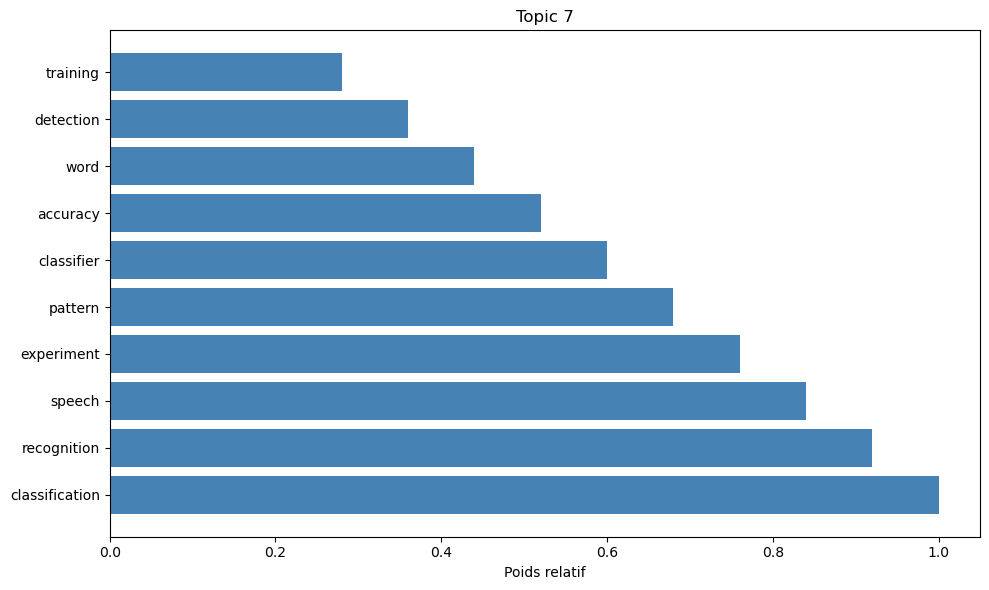

In [5]:
# Initialiser le modèle NMF (Non-negative Matrix Factorization)

nmf_model = NMFTopicModel(num_topics=8)

# Entraîner le modèle sur les documents filtrés
print("Entraînement du modèle NMF...")
nmf_model.fit(filtered_docs)

# Récupérer les topics avec leurs 10 mots les plus représentatifs
nmf_topics = nmf_model.get_topics(num_words=10)

# Afficher les topics et leurs mots-clés
print("\nTopics détectés avec NMF :")
print("-" * 40)
for topic, words in nmf_topics.items():
    print(f"{topic} : {', '.join(words)}")
print("-" * 40)

# Calculer et afficher le score de cohérence
coherence = evaluate_topic_coherence(nmf_model, filtered_docs)
print(f"\nScore de cohérence NMF : {coherence:.4f}")
print("(Un score plus élevé indique des topics mieux définis et distincts)")

# Visualiser les topics avec des graphiques
print("\nVisualisation des topics NMF :")
visualize_topics(nmf_topics)



In [6]:
# Comparaison des topics entre NMF et LDA
print("\nTopics identifiés par NMF:")
for topic_id, words in nmf_topics.items():
    print(f"{topic_id} : {', '.join(words)}")

print("\nTopics identifiés par LDA:")
for topic_id, words in lda_topics.items():
    print(f"{topic_id} : {', '.join(words)}")


Topics identifiés par NMF:
Topic 0 : software, development, tool, environment, technology, support, management, project, social, architecture
Topic 1 : constraint, program, rule, space, logic, structure, state, property, given, value
Topic 2 : web, query, search, semantic, page, document, ontology, retrieval, database, content
Topic 3 : graph, edge, vertex, node, structure, matching, given, property, degree, random
Topic 4 : agent, environment, game, behavior, multiagent, strategy, action, mechanism, interaction, simulation
Topic 5 : scheme, node, protocol, sensor, security, key, attack, wireless, energy, communication
Topic 6 : object, motion, visual, tracking, video, moving, spatial, structure, robot, detection
Topic 7 : classification, recognition, speech, experiment, pattern, classifier, accuracy, word, detection, training

Topics identifiés par LDA:
Topic 0 : query, web, semantic, text, document, ontology, search, content, database, retrieval
Topic 1 : development, software, tool

## 5. Application du Topic Modeling avec BERTopic


In [5]:
from matplotlib import pyplot as plt

# Initialiser le modèle BERTopic
print("Initialisation du modèle BERTopic...")
bertopic_model = BERTopicModel()

# Entraîner le modèle sur les documents filtrés
print("Entraînement du modèle BERTopic...")
bertopic_model.fit(filtered_docs)

Initialisation du modèle BERTopic...
Entraînement du modèle BERTopic...


In [7]:
# Récupérer les topics (cest le modèle qui détermine le nombre de thèmes)
bertopic_topics = bertopic_model.get_topics(n_words=10)


Nombre total de topics détectés: 65

Les 8 topics les plus grands (par nombre de documents) :
------------------------------------------------------------
Topic 0 (2556 documents): object, segmentation, shape, detection, motion, surface, scene, color, visual, region
Topic 1 (1053 documents): agent, game, equilibrium, trust, multiagent, negotiation, mechanism, player, strategy, auction
Topic 2 (1006 documents): speech, recognition, speaker, acoustic, voice, word, dialogue, question, asr, vowel
Topic 3 (934 documents): business, organization, project, management, firm, development, software, technology, requirement, government
Topic 4 (735 documents): protocol, attack, scheme, key, security, secure, encryption, signature, cipher, secret
Topic 5 (684 documents): graph, vertex, edge, tree, node, subgraph, search, minimum, path, given
Topic 6 (664 documents): gene, protein, biological, sequence, molecular, dna, pathway, genome, expression, discovery
Topic 7 (613 documents): parallel, memor

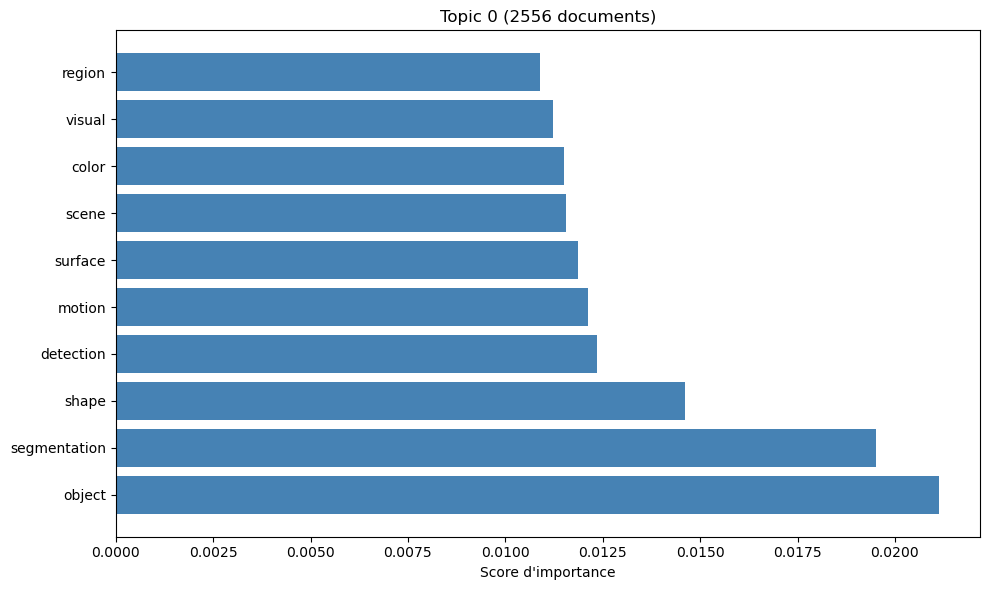

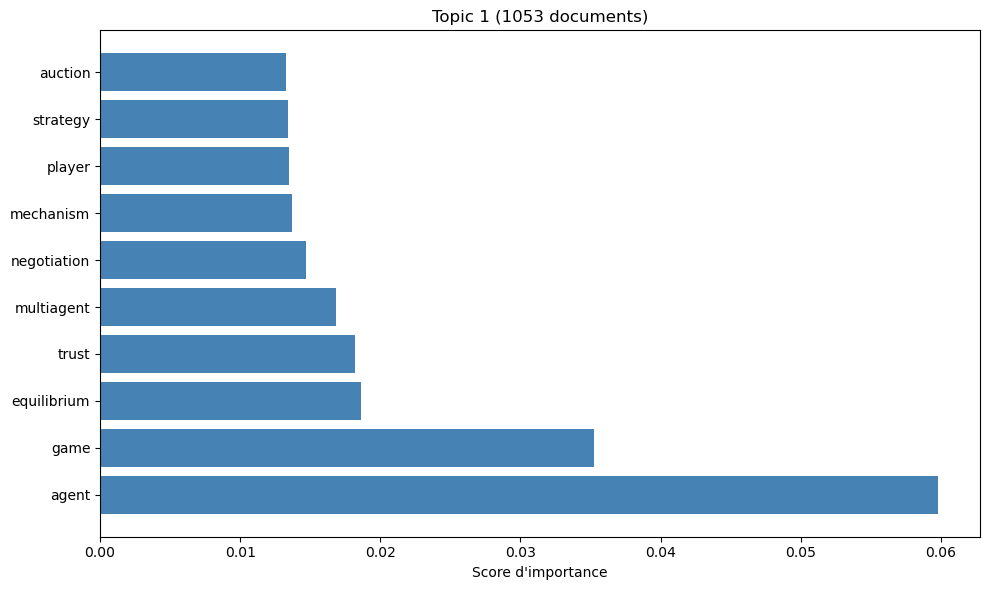

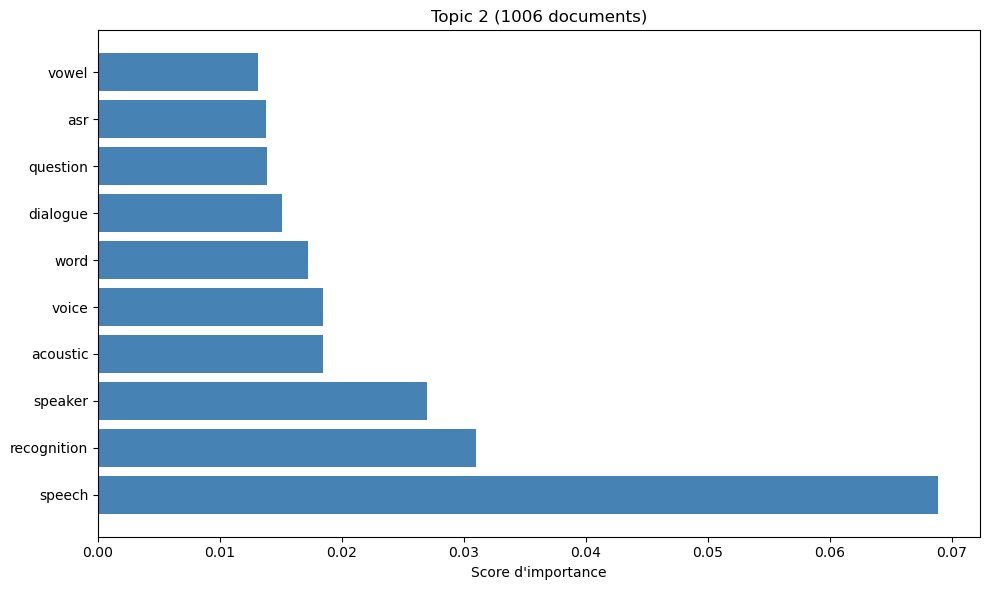

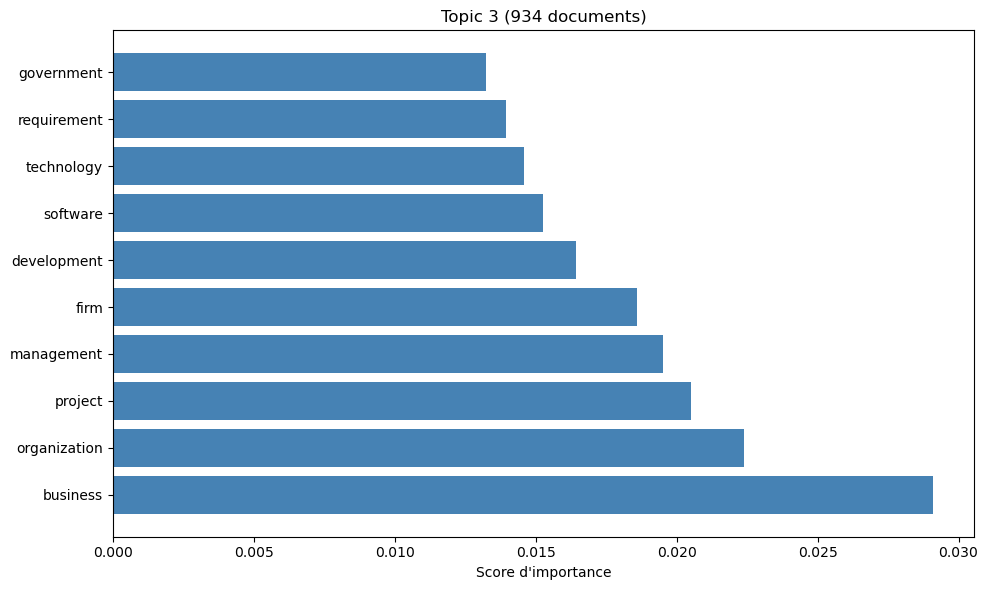

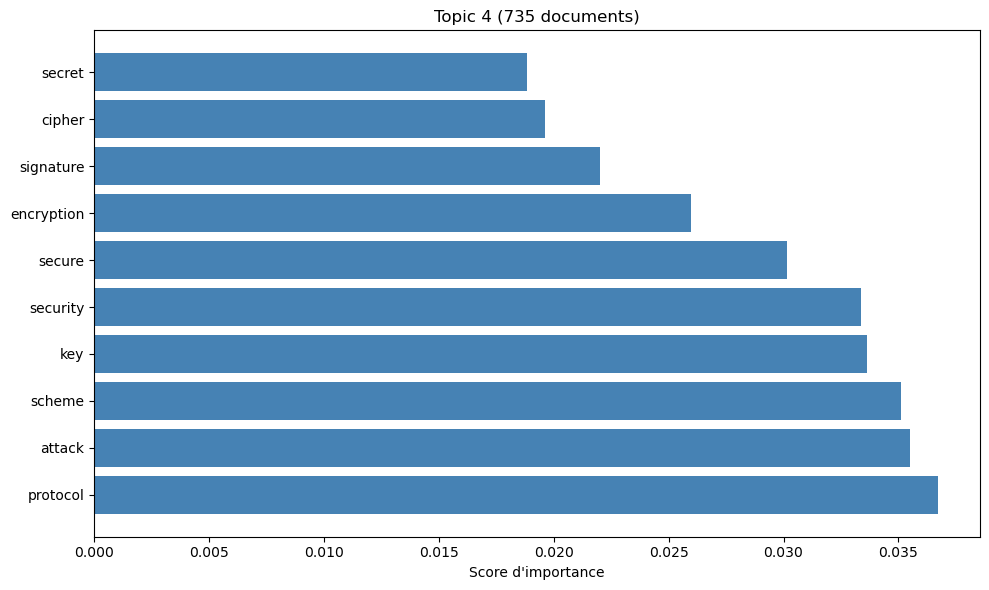

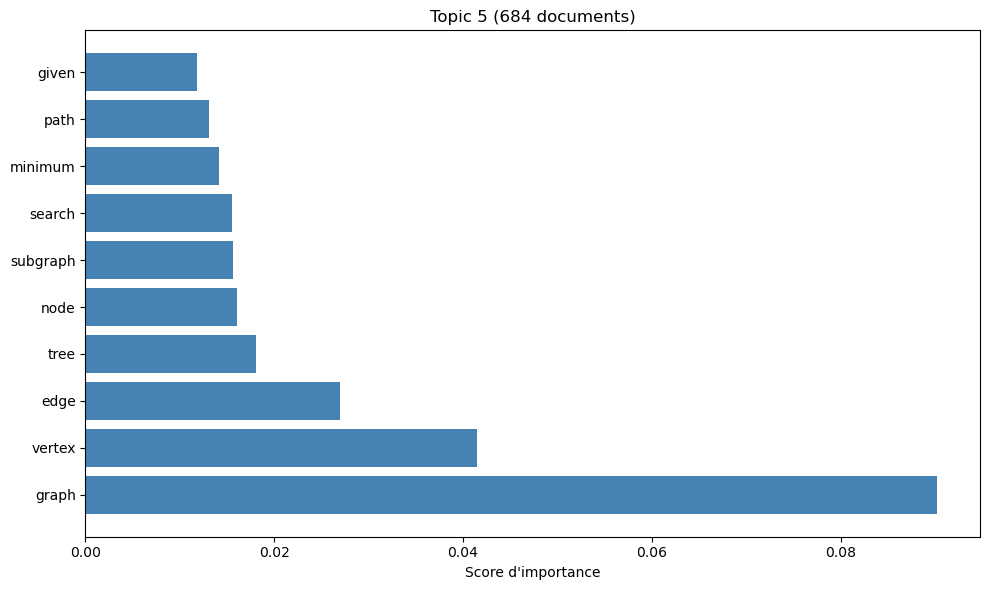

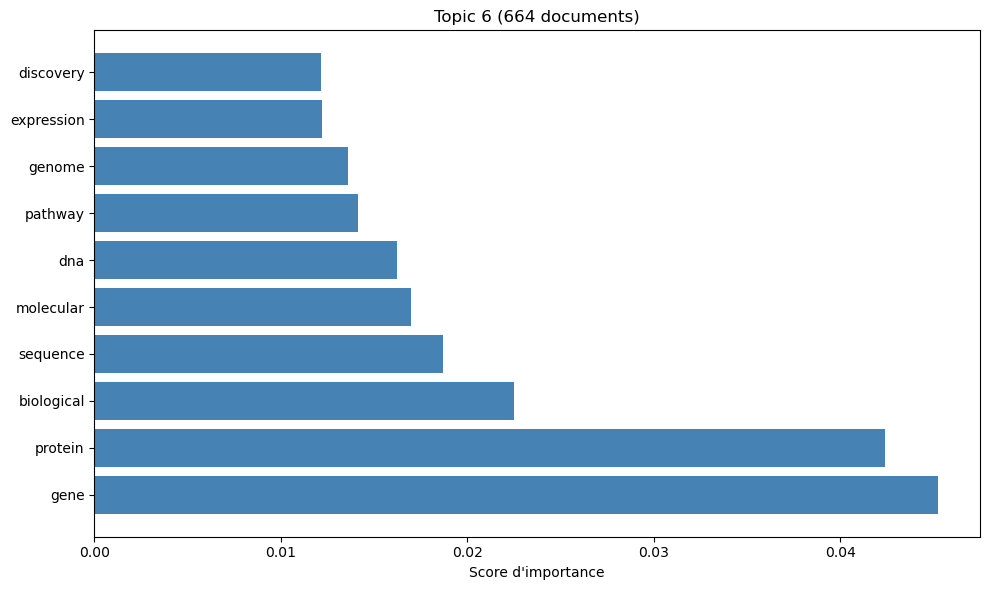

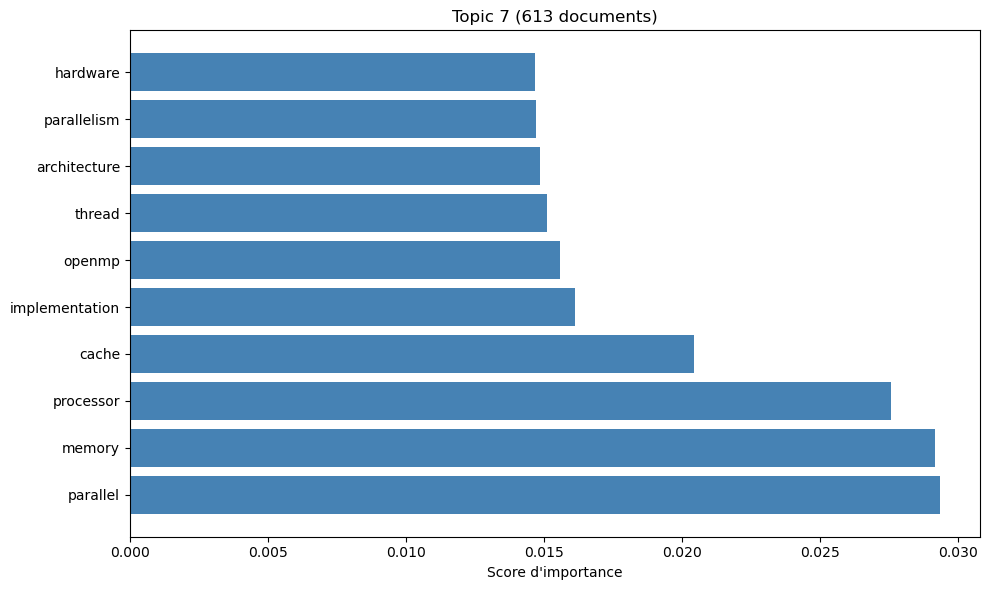

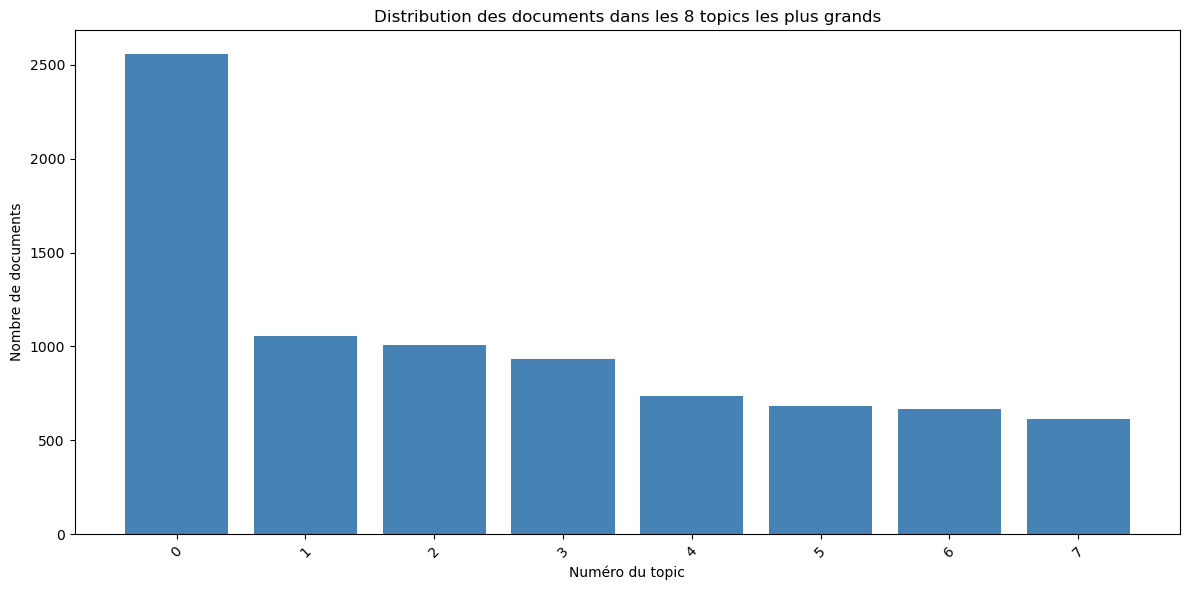

In [9]:
bertopic_model.show_top_n_topics(n=8, num_words=10)

## 6. Évaluation des modèles de Topic Modeling


In [ ]:
# Évaluer la cohérence des topics
lda_coherence = evaluate_topic_coherence(lda_model, filtered_docs)
nmf_coherence = evaluate_topic_coherence(nmf_model, filtered_docs)

print(f"Score de cohérence (silhouette) des topics LDA : {lda_coherence}")
print(f"Score de cohérence ( silhouette)des topics NMF : {nmf_coherence}")


# ## 7. Sauvegarde des résultats


In [ ]:
output_dir = "../data/processed/"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarde des topics LDA
import json
json_path_lda = os.path.join(output_dir, "lda_topics.json")
with open(json_path_lda, "w", encoding="utf-8") as f:
    json.dump(lda_topics, f, indent=4)
print(f"Topics LDA enregistrés en JSON : {json_path_lda}")

# Sauvegarde des topics NMF
json_path_nmf = os.path.join(output_dir, "nmf_topics.json")
with open(json_path_nmf, "w", encoding="utf-8") as f:
    json.dump(nmf_topics, f, indent=4)
print(f"Topics NMF enregistrés en JSON : {json_path_nmf}")

# Sauvegarde des topics BERTopic
json_path_bertopic = os.path.join(output_dir, "bertopic_topics.json")
with open(json_path_bertopic, "w", encoding="utf-8") as f:
    json.dump(bertopic_topics, f, indent=4)
print(f"Topics BERTopic enregistrés en JSON : {json_path_bertopic}")


In [6]:
from matplotlib import pyplot as plt
import os
import pickle
import joblib
from pathlib import Path


# Créer le répertoire si nécessaire
save_path = Path("../data/processed/modele_bert")
save_path.mkdir(parents=True, exist_ok=True)

# Enregistrer le modèle
print("Enregistrement du modèle BERTopic...")
joblib.dump(bertopic_model, save_path / "bertopic_model.joblib")



Initialisation du modèle BERTopic...
Entraînement du modèle BERTopic...


KeyboardInterrupt: 

In [ ]:
import joblib
from pathlib import Path

# Chemin vers le modèle sauvegardé
model_path = Path("../data/processed/modele_bert/bertopic_model.joblib")

# Charger le modèle
print("Chargement du modèle BERTopic...")
bertopic_model = joblib.load(model_path)

# Vérifier que le modèle est correctement chargé
print(f"Modèle chargé avec succès. Nombre de topics: {len(bertopic_model.get_topics())}")